# 0.0 DATA IMPORTS

In [2]:
import math
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from IPython.core.display import HTML
import inflection
import missingno as msno

## 0.1. Helper Functions

In [3]:
def jupyter_settings():
    %matplotlib inline
    %pylab inline
    
    plt.style.use( 'bmh' )
    plt.rcParams['figure.figsize'] = [25, 12]
    plt.rcParams['font.size'] = 24
    
    display( HTML( '<style>.container { width:100% !important; }</style>') )
    pd.options.display.max_columns = None
    pd.options.display.max_rows = 20
    pd.set_option( 'display.expand_frame_repr', False )
    
    sns.set()

jupyter_settings()

def missing_percentage(df):
    """This function takes a DataFrame(df) as input and returns two columns, total missing values and total missing values percentage"""
    ## the two following line may seem complicated but its actually very simple. 
    total = df.isnull().sum().sort_values(ascending = False)[df.isnull().sum().sort_values(ascending = False) != 0]
    percent = round(df.isnull().sum().sort_values(ascending = False)/len(df)*100,2)[round(df.isnull().sum().sort_values(ascending = False)/len(df)*100,2) != 0]
    return pd.concat([total, percent], axis=1, keys=['Total','Percent'])

Populating the interactive namespace from numpy and matplotlib


## 0.2. Loading Data

In [5]:
df_store_raw = pd.read_csv('data/store.csv', low_memory=False)
df_sales_raw = pd.read_csv('data/train.csv', low_memory=False)


In [6]:
print(df_store_raw.shape) # 1115 stores, 10 columns
print(df_sales_raw.shape) #1017209 sales, 9 columns
print(df_sales_raw.columns.to_list()) #1017209 sales, 9 columns
print(df_store_raw.columns.to_list()) # 1115 stores, 10 columns

(1115, 10)
(1017209, 9)
['Store', 'DayOfWeek', 'Date', 'Sales', 'Customers', 'Open', 'Promo', 'StateHoliday', 'SchoolHoliday']
['Store', 'StoreType', 'Assortment', 'CompetitionDistance', 'CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear', 'Promo2', 'Promo2SinceWeek', 'Promo2SinceYear', 'PromoInterval']


In [7]:
# merge
df_raw = pd.merge(df_sales_raw, df_store_raw, how = 'left', on = 'Store')
df_raw.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,5,2015-07-31,5263,555,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,5,2015-07-31,6064,625,1,1,0,1,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,5,2015-07-31,8314,821,1,1,0,1,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,5,2015-07-31,13995,1498,1,1,0,1,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,5,2015-07-31,4822,559,1,1,0,1,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


# 1.0. DESCRIÇÃO DOS DADOS

## 1.1. Rename Columns

In [8]:
df1 = df_raw.copy()

In [9]:
old_cols = ['Store', 'DayOfWeek', 'Date', 'Sales', 'Customers', 'Open', 'Promo', 'StateHoliday', 'SchoolHoliday',
            'StoreType', 'Assortment', 'CompetitionDistance', 'CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear',
            'Promo2', 'Promo2SinceWeek', 'Promo2SinceYear', 'PromoInterval']

In [10]:
# using snakecase
new_cols = list(map(lambda x: inflection.underscore(x), old_cols))
new_cols
df1.columns = new_cols
df1.head()

,store,day_of_week,date,sales,customers,open,promo,state_holiday,school_holiday,store_type,assortment,competition_distance,competition_open_since_month,competition_open_since_year,promo2,promo2_since_week,promo2_since_year,promo_interval
0,1,5,2015-07-31,5263,555,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,5,2015-07-31,6064,625,1,1,0,1,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,5,2015-07-31,8314,821,1,1,0,1,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,5,2015-07-31,13995,1498,1,1,0,1,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,5,2015-07-31,4822,559,1,1,0,1,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


## 1.2. Data Dimensions

In [11]:
print(f'# rows: {df1.shape[0]} | # columns: {df1.shape[1]}')

# rows: 1017209 | # columns: 18


## 1.3. Data Types

In [12]:
df1['date'] = pd.to_datetime(df1['date'])
df1.dtypes

store                                    int64
day_of_week                              int64
date                            datetime64[ns]
sales                                    int64
customers                                int64
open                                     int64
promo                                    int64
state_holiday                           object
school_holiday                           int64
store_type                              object
assortment                              object
competition_distance                   float64
competition_open_since_month           float64
competition_open_since_year            float64
promo2                                   int64
promo2_since_week                      float64
promo2_since_year                      float64
promo_interval                          object
dtype: object

## 1.4. Checking & Filling out NA Values

In [13]:
missing_percentage(df1)

,Total,Percent
promo_interval,508031,49.94
promo2_since_week,508031,49.94
promo2_since_year,508031,49.94
competition_open_since_year,323348,31.79
competition_open_since_month,323348,31.79
competition_distance,2642,0.26


### 1.4.1. competition_distance

In [14]:
# df1.loc[df1['competition_distance'].isna() , ['competition_distance', 'store','competition_open_since_year']]
# df1['competition_distance'].describe()
df1['competition_distance'] = df1['competition_distance'].apply(lambda x: 200000.0 if math.isnan(x) else x)

### 1.4.2. competition_open_since_month & competition_open_since_year

In [15]:
# checking unique values. If zero, all values are NaN
# df1[df1['competition_open_since_year'].isna() & 
#     df1['competition_open_since_month'].isna()]['competition_open_since_month'].nunique()
# df1[df1['competition_open_since_year'].isna() & 
#     df1['competition_open_since_month'].isna()]['competition_open_since_year'].nunique()

In [16]:
df1['date'].value_counts(ascending = True)

2014-10-23     935
2014-12-08     935
2014-07-01     935
2014-10-20     935
2014-10-28     935
              ... 
2013-03-30    1115
2014-04-12    1115
2015-04-25    1115
2013-07-22    1115
2015-06-09    1115
Name: date, Length: 942, dtype: int64

In [17]:
# df1['competition_open_since_month'].describe()
# df1['competition_open_since_year'].describe()

df1['competition_open_since_month'] = df1.apply( lambda x: x['date'].month 
                                                if math.isnan( x['competition_open_since_month'] ) 
                                                else x['competition_open_since_month'], axis=1 )

df1['competition_open_since_year'] = df1.apply( lambda x: x['date'].year 
                                               if math.isnan( x['competition_open_since_year'] ) 
                                               else x['competition_open_since_year'], axis=1 )


### 1.4.3. promo2_since_year & promo2_since_week

In [18]:
# checking unique values
df1[df1['promo2_since_year'].isna() & 
    df1['promo2_since_week'].isna() & df1['promo_interval'].isna()]['promo2'].value_counts()

0    508031
Name: promo2, dtype: int64

In [19]:
# df1['promo2_since_year'].describe() # a year has approx 52 weeks.
df1['promo2_since_year'] = df1.apply(lambda x: x['date'].year 
                                     if math.isnan(x['promo2_since_year']) 
                                     else x['promo2_since_year'], axis = 1)

df1['promo2_since_week'] = df1.apply(lambda x: x['date'].week 
                                     if math.isnan(x['promo2_since_week']) 
                                     else x['promo2_since_week'], axis = 1)


### 1.4.4. promo_interval

In [20]:
#df1[df1['promo_interval'].isna()]['promo2'].value_counts() 
#df1['promo_interval'].value_counts()
month_map = {1: 'Jan',  2: 'Fev',  3: 'Mar',  4: 'Apr',  5: 'May', 
             6: 'Jun',  7: 'Jul',  8: 'Aug',  9: 'Sep',  10: 'Oct', 11: 'Nov', 12: 'Dec'}

df1['month_map'] = df1['date'].dt.month.map(month_map)
df1['promo_interval'].fillna(0, inplace = True)
df1.head()

,store,day_of_week,date,sales,customers,open,promo,state_holiday,school_holiday,store_type,assortment,competition_distance,competition_open_since_month,competition_open_since_year,promo2,promo2_since_week,promo2_since_year,promo_interval,month_map
0,1,5,2015-07-31,5263,555,1,1,0,1,c,a,1270.0,9.0,2008.0,0,31.0,2015.0,0,Jul
1,2,5,2015-07-31,6064,625,1,1,0,1,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct",Jul
2,3,5,2015-07-31,8314,821,1,1,0,1,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct",Jul
3,4,5,2015-07-31,13995,1498,1,1,0,1,c,c,620.0,9.0,2009.0,0,31.0,2015.0,0,Jul
4,5,5,2015-07-31,4822,559,1,1,0,1,a,a,29910.0,4.0,2015.0,0,31.0,2015.0,0,Jul


In [21]:
# New variable is_promo. Checks whether the store is running a consecutive promo on the sales date.

df1['is_promo'] = df1.apply(lambda x: 0 if x['promo_interval'] == 0 
                            else 1 if x['month_map'] in x['promo_interval'].split(',') 
                            else 0, axis = 1)

In [22]:
missing_percentage(df1)

,Total,Percent


## 1.5. Change Dtypes

In [23]:
df1['promo2_since_week'] = df1['promo2_since_week'].astype(int) 
df1['promo2_since_year'] = df1['promo2_since_year'].astype(int) 
df1['competition_open_since_month'] = df1['competition_open_since_month'].astype(int) 
df1['competition_open_since_year'] = df1['competition_open_since_year'].astype(int) 
# df1['month_map'] = df1['month_map'].astype(str) 
# df1['promo_interval'] = df1['promo_interval'].astype(str) 
# df1['assortment'] = df1['assortment'].astype(str) 
# df1['store_type'] = df1['store_type'].astype(str) 
# df1['state_holiday'] = df1['state_holiday'].astype(str) 


In [24]:
df1.dtypes

store                                    int64
day_of_week                              int64
date                            datetime64[ns]
sales                                    int64
customers                                int64
open                                     int64
promo                                    int64
state_holiday                           object
school_holiday                           int64
store_type                              object
assortment                              object
competition_distance                   float64
competition_open_since_month             int64
competition_open_since_year              int64
promo2                                   int64
promo2_since_week                        int64
promo2_since_year                        int64
promo_interval                          object
month_map                               object
is_promo                                 int64
dtype: object

In [25]:
df1['competition_open_since_year'].value_counts()

2013    204636
2014    182822
2015    110108
2012     74299
2005     56564
         ...  
1994      1884
1995      1700
1998       942
1961       942
1900       758
Name: competition_open_since_year, Length: 23, dtype: int64

## 1.7. Descriptive Statistics

In [26]:
num_feat = df1.select_dtypes( include = ['int64','float64'])
cat_feat = df1.select_dtypes( exclude = ['int64','float64','datetime64[ns]'])

In [27]:
num_feat.head(1)

,store,day_of_week,sales,customers,open,promo,school_holiday,competition_distance,competition_open_since_month,competition_open_since_year,promo2,promo2_since_week,promo2_since_year,is_promo
0,1,5,5263,555,1,1,1,1270.0,9,2008,0,31,2015,0


In [28]:
cat_feat.head(1)

,state_holiday,store_type,assortment,promo_interval,month_map
0,0,c,a,0,Jul


### 1.7.1. Numerical Features

In [29]:
#### Central Tendency 
# 1st moment (mean)
ct_mean = pd.DataFrame(num_feat.apply( np.mean )).T
# median
ct_median = pd.DataFrame(num_feat.apply( np.median )).T

#### Dispersion
# 2nd moment (variance)
d_var = pd.DataFrame(num_feat.apply( np.var)).T
# std
d_std = pd.DataFrame(num_feat.apply( np.std)).T
# min
d_min = pd.DataFrame(num_feat.apply(min)).T
# max
d_max = pd.DataFrame(num_feat.apply(max)).T
# range
d_range = pd.DataFrame(num_feat.apply(lambda x: x.max() - x.min())).T
# 3rd moment (Skew)
d_sk = pd.DataFrame(num_feat.apply(lambda x: x.skew())).T
# 4th moment (Kurtosis)
d_kurt = pd.DataFrame(num_feat.apply(lambda x: x.kurtosis())).T
# Q1 quantile
d_q1 = pd.DataFrame(num_feat.apply(lambda x: np.quantile(x, .25))).T
# Q3 quantile
d_q3 = pd.DataFrame(num_feat.apply(lambda x: np.quantile(x, .75))).T


In [30]:
# concatenate
m = pd.concat([d_min, d_max, d_range, ct_mean, d_q1, ct_median, d_q3, d_std, d_sk, d_kurt]).T.reset_index()
m.columns = ['attributes', 'min', 'max','range','mean','25%', '50%','75%','std', 'skew', 'kurtosis']
m

,attributes,min,max,range,mean,25%,50%,75%,std,skew,kurtosis
0,store,1.0,1115.0,1114.0,558.429727,280.0,558.0,838.0,321.908493,-0.000955,-1.200524
1,day_of_week,1.0,7.0,6.0,3.998341,2.0,4.0,6.0,1.997390,0.001593,-1.246873
2,sales,0.0,41551.0,41551.0,5773.818972,3727.0,5744.0,7856.0,3849.924283,0.641460,1.778375
3,customers,0.0,7388.0,7388.0,633.145946,405.0,609.0,837.0,464.411506,1.598650,7.091773
4,open,0.0,1.0,1.0,0.830107,1.0,1.0,1.0,0.375539,-1.758045,1.090723
5,promo,0.0,1.0,1.0,0.381515,0.0,0.0,1.0,0.485758,0.487838,-1.762018
6,school_holiday,0.0,1.0,1.0,0.178647,0.0,0.0,0.0,0.383056,1.677842,0.815154
7,competition_distance,20.0,200000.0,199980.0,5935.442677,710.0,2330.0,6910.0,12547.646829,10.242344,147.789712
8,competition_open_since_month,1.0,12.0,11.0,6.786849,4.0,7.0,10.0,3.311085,-0.042076,-1.232607
9,competition_open_since_year,1900.0,2015.0,115.0,2010.324840,2008.0,2012.0,2014.0,5.515591,-7.235657,124.071304


### 1.7.2. Categorical Features

In [31]:
cat_feat.apply(lambda x: x.nunique())

state_holiday      4
store_type         4
assortment         3
promo_interval     4
month_map         12
dtype: int64

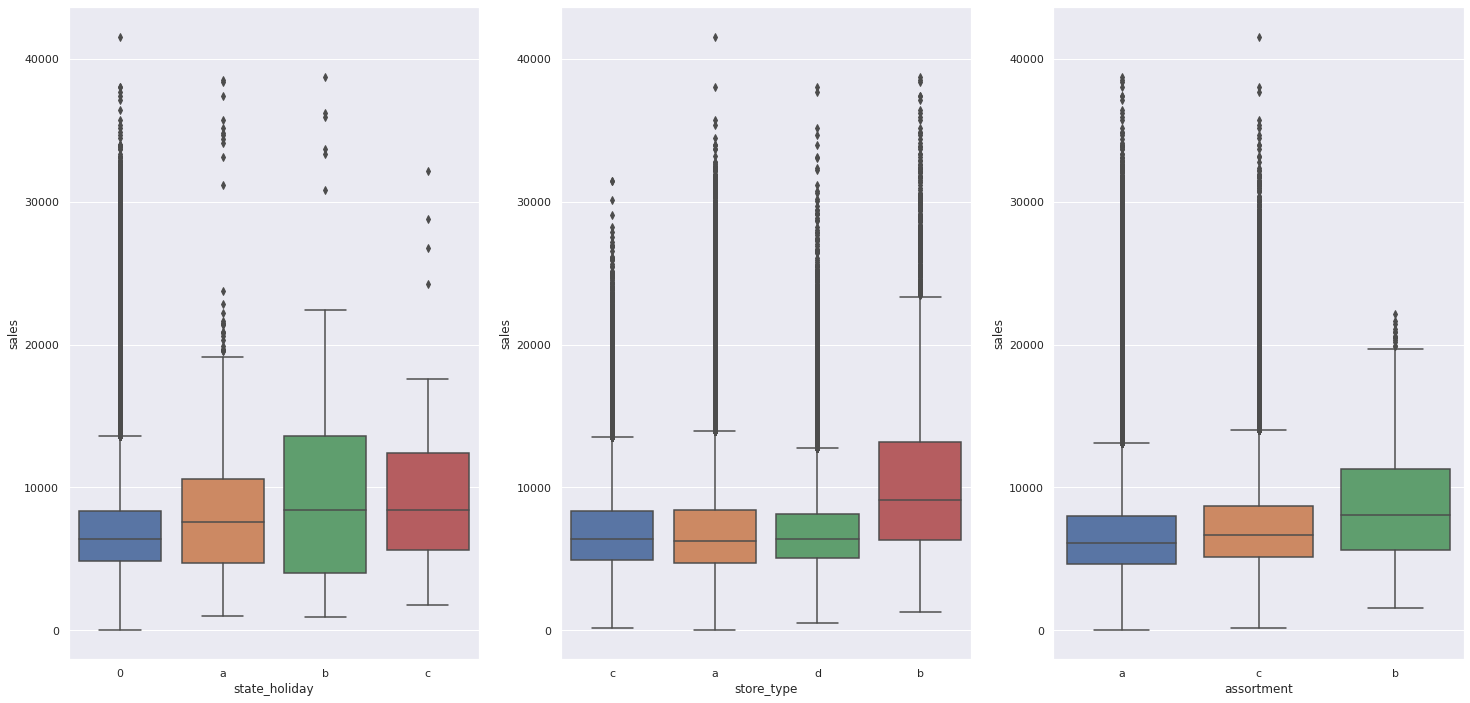

In [33]:
aux1 = df1[(df1['state_holiday'] != 0) & (df1['sales'] != 0)]

plt.subplot(1,3,1)
sns.boxplot(x = 'state_holiday', y = 'sales', data = aux1);

plt.subplot(1,3,2)
sns.boxplot(x = 'store_type', y = 'sales', data = aux1);

plt.subplot(1,3,3)
sns.boxplot(x = 'assortment', y = 'sales', data = aux1);


In [36]:
df1.to_csv(r'data\df1.csv', index = False)

In [4]:
df2 = pd.read_csv('data/df1.csv')
df2

/home/alan/.pyenv/versions/3.8.1/envs/StoreSales/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3145: DtypeWarning: Columns (7) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,store,day_of_week,date,sales,customers,open,promo,state_holiday,school_holiday,store_type,assortment,competition_distance,competition_open_since_month,competition_open_since_year,promo2,promo2_since_week,promo2_since_year,promo_interval,month_map,is_promo
0,1,5,2015-07-31,5263,555,1,1,0,1,c,a,1270.0,9,2008,0,31,2015,0,Jul,0
1,2,5,2015-07-31,6064,625,1,1,0,1,a,a,570.0,11,2007,1,13,2010,"Jan,Apr,Jul,Oct",Jul,1
2,3,5,2015-07-31,8314,821,1,1,0,1,a,a,14130.0,12,2006,1,14,2011,"Jan,Apr,Jul,Oct",Jul,1
3,4,5,2015-07-31,13995,1498,1,1,0,1,c,c,620.0,9,2009,0,31,2015,0,Jul,0
4,5,5,2015-07-31,4822,559,1,1,0,1,a,a,29910.0,4,2015,0,31,2015,0,Jul,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1017204,1111,2,2013-01-01,0,0,0,0,a,1,a,a,1900.0,6,2014,1,31,2013,"Jan,Apr,Jul,Oct",Jan,1
1017205,1112,2,2013-01-01,0,0,0,0,a,1,c,c,1880.0,4,2006,0,1,2013,0,Jan,0
1017206,1113,2,2013-01-01,0,0,0,0,a,1,a,c,9260.0,1,2013,0,1,2013,0,Jan,0
1017207,1114,2,2013-01-01,0,0,0,0,a,1,a,c,870.0,1,2013,0,1,2013,0,Jan,0
